In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']=(6,6)
#plt.rcParams['font.weight']='bold'
#plt.rcParams['axes.labelweight']='bold'
#plt.rcParams['lines.linewidth']=1.5
#plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.meshing import load_gs_mesh
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

from omfit_classes.omfit_eqdsk import boundaryShape

In [2]:
mygs = TokaMaker()
mesh_pts,mesh_lc,mesh_reg,coil_dict,cond_dict = load_gs_mesh('nextstep_mesh_0801.h5')
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict,coil_dict=coil_dict)
mygs.setup(order=2,F0=1*3)

coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Constrain CS current
coil_reg_mat[0,0] = 1
coil_reg_mat[1,1] = 1
coil_reg_mat[1,0] = -1
coil_reg_mat[2,2] = 1
coil_reg_mat[2,1] = -1

targets[0] = -3E6

coil_weights[:3] = 5

#Enforce up/down symmetry in PF coils
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
coil_reg_mat[4,8] = -1
coil_reg_mat[5,5] = 1
coil_reg_mat[5,9] = -1
coil_reg_mat[6,6] = 1
coil_reg_mat[6,10] = -1

mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

#Set upper bound on coil currents
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11

#Set upper bounds on divertor coils
#coil_bounds[-3:-1, 0] = -122448.979592
#coil_bounds[-3:-1, 1] = 122448.979592
coil_bounds[-3:-1, 0] = 0
coil_bounds[-3:-1, 1] = 0

mygs.set_coil_bounds(coil_bounds)

# Define shape of P' anf FF' profiles
n_sample = 40
psi_sample = np.linspace(0.0,1.0,n_sample)
# Set F*F' profile
alpha = 2
gamma = 1.25
ffp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
# Set P' profile
alpha = 2
gamma = 1.25
pp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

# set global targets
Ip_target = 0.75E6
mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          aba6d8f
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  6.143E+00
    # of points  =   10020
    # of edges   =   29927
    # of cells   =   19908
    # of boundary points =     130
    # of boundary edges  =     130
    # of boundary cells  =     130
  Resolution statistics:
    hmin =  3.000E-03
    hrms =  2.845E-02
    hmax =  1.1

In [3]:
vv_inner = np.array([[1500.63879395,  195.        ],
       [1392.3737793 ,  195.        ],
       [1389.87475586,  200.        ],
       [1389.85327148,  256.5866394 ],
       [1471.61755371,  282.48086548],
       [1426.31530762,  425.47885132],
       [1389.85327148,  413.93151855],
       [1389.87304688,  460.        ],
       [1279.95019531,  460.        ],
       [1279.95019531,  625.        ],
       [1065.09118652,  625.        ],
       [1065.09106445,  744.92041016],
       [ 890.07617188,  744.92041016],
       [ 890.07617188,  625.        ],
       [ 879.95056152,  625.        ],
       [ 879.95056152,  460.        ],
       [ 669.24145508,  460.        ],
       [ 669.24145508, -460.        ],
       [ 879.95056152, -460.        ],
       [ 879.95056152, -625.        ],
       [ 890.07617188, -625.        ],
       [ 890.07617188, -744.92041016],
       [1065.09106445, -744.92041016],
       [1065.09118652, -625.        ],
       [1279.95019531, -625.        ],
       [1279.95019531, -460.        ],
       [1389.87304688, -460.        ],
       [1389.88684082, -437.27053833],
       [1456.80090332, -459.59100342],
       [1504.26757812, -317.29898071],
       [1389.88684082, -279.14501953],
       [1389.87475586, -200.        ],
       [1392.3737793 , -195.        ],
       [1500.63879395, -195.        ]])

vv_outer = np.array([[1530.65148926,  220.        ],
       [1500.63879395,  220.        ],
       [1500.63879395,  200.        ],
       [1399.87316895,  200.        ],
       [1399.84533691,  256.60427856],
       [1472.52368164,  279.62091064],
       [1481.43310547,  251.49797058],
       [1500.50280762,  257.53723145],
       [1435.56945801,  462.50097656],
       [1416.49975586,  456.46173096],
       [1425.40930176,  428.33880615],
       [1399.84533691,  420.24295044],
       [1399.87207031,  470.        ],
       [1289.99987793,  470.00009155],
       [1289.99975586,  635.        ],
       [1068.09130859,  635.        ],
       [1068.09130859,  744.92041016],
       [1102.09423828,  744.92041016],
       [1102.09423828,  764.92041016],
       [ 877.07501221,  764.92041016],
       [ 877.07501221,  744.92041016],
       [ 887.0758667 ,  744.92041016],
       [ 887.0758667 ,  635.        ],
       [ 869.95117188,  635.        ],
       [ 869.95117188,  470.        ],
       [ 658.95697021,  470.        ],
       [ 658.95697021, -470.        ],
       [ 869.95117188, -470.        ],
       [ 869.95117188, -635.        ],
       [ 887.0758667 , -635.        ],
       [ 887.0758667 , -744.92041016],
       [ 877.07501221, -744.92041016],
       [ 877.07501221, -764.92041016],
       [1073.09191895, -764.92059326],
       [1073.09191895, -744.92059326],
       [1068.09130859, -744.92041016],
       [1068.09130859, -635.        ],
       [1289.99975586, -635.        ],
       [1289.99987793, -470.00009155],
       [1399.87207031, -470.        ],
       [1399.88354492, -443.76760864],
       [1455.8515625 , -462.43685913],
       [1452.05419922, -473.82019043],
       [1471.02697754, -480.14892578],
       [1527.98706055, -309.39849854],
       [1509.01428223, -303.06976318],
       [1505.21691895, -314.453125  ],
       [1399.88354492, -279.31704712],
       [1399.87316895, -200.        ],
       [1500.63879395, -200.        ],
       [1500.63879395, -220.        ],
       [1530.65148926, -220.        ]])

In [4]:
import json
with open('nsf_geom_new.json','r') as fid:
    geom = json.load(fid)

In [16]:
norm = plt.Normalize(-0.8, 0.8)
import matplotlib as mpl
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])

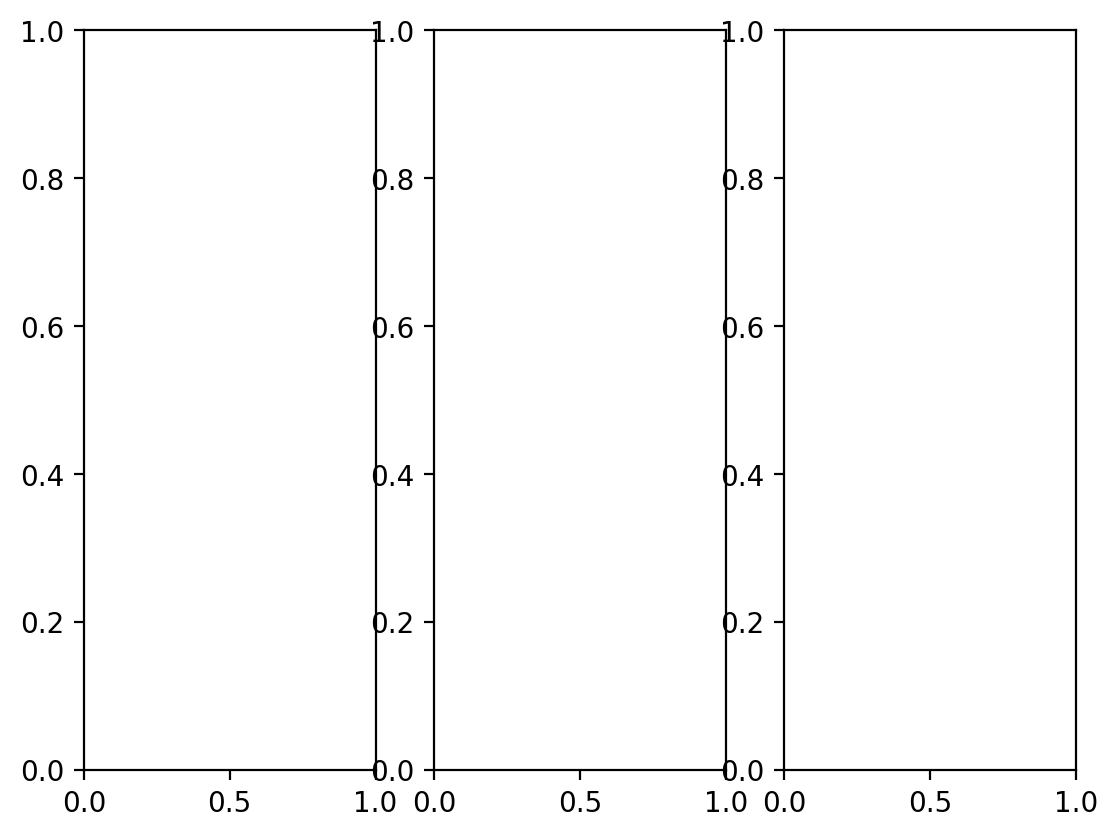

In [6]:
fig, ax = plt.subplots(1,3)

Starting non-linear GS solver
     1  6.9655E+00  3.2799E+00  9.3922E-03  1.0371E+00 -1.5025E-04 -0.0000E+00
     2  6.1808E+00  2.9300E+00  2.2375E-03  1.0379E+00 -1.0957E-04 -0.0000E+00
     3  5.9278E+00  2.8180E+00  5.2378E-04  1.0379E+00 -8.8931E-05 -0.0000E+00
     4  5.8372E+00  2.7776E+00  2.1572E-04  1.0378E+00 -7.7781E-05 -0.0000E+00
     5  5.8044E+00  2.7628E+00  1.0791E-04  1.0378E+00 -7.1976E-05 -0.0000E+00
     6  5.7930E+00  2.7575E+00  5.1422E-05  1.0378E+00 -6.8991E-05 -0.0000E+00
     7  5.7893E+00  2.7557E+00  2.3244E-05  1.0378E+00 -6.7455E-05 -0.0000E+00
     8  5.7882E+00  2.7551E+00  1.0132E-05  1.0378E+00 -6.6657E-05 -0.0000E+00
     9  5.7880E+00  2.7549E+00  4.3141E-06  1.0378E+00 -6.6242E-05 -0.0000E+00
    10  5.7879E+00  2.7549E+00  1.8137E-06  1.0378E+00 -6.6024E-05 -0.0000E+00
    11  5.7880E+00  2.7549E+00  7.6020E-07  1.0378E+00 -6.5910E-05 -0.0000E+00
 Timing:   2.3490139995701611     
   Source:    0.78180899936705828     
   Solve:      1.0030540013

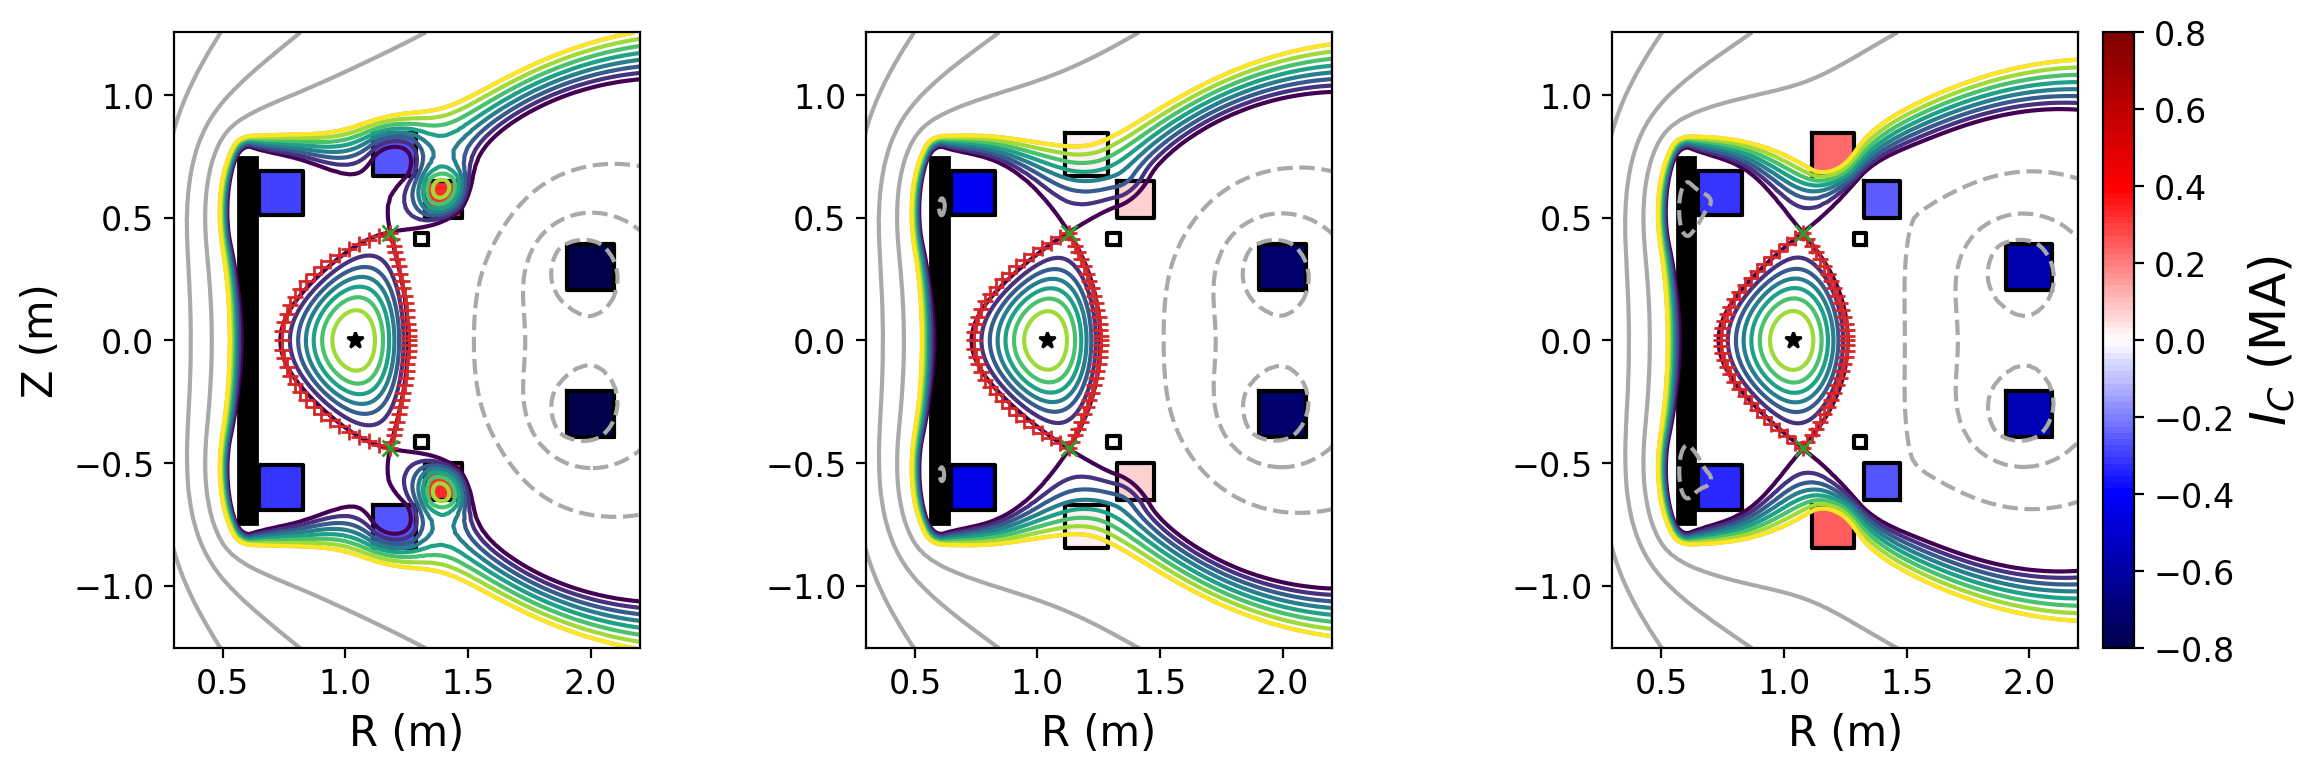

In [17]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(1, 3, width_ratios=[1, 1,1.1], wspace = .2)

fig = plt.figure(figsize = (13,4))
ax[0] = fig.add_subplot(gs[0])
ax[1] = fig.add_subplot(gs[1])
ax[2] = fig.add_subplot(gs[2])

plt.rcParams['lines.linewidth']=1.5
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
ax[0].set_ylabel('Z (m)', fontsize = 15)
for a in ax:
   #a.fill(vv_outer[:,0], vv_outer[:,1], c = 'k')
   # a.fill(vv_inner[:,0], vv_inner[:,1], c = 'w')
   a.set_xlabel('R (m)', fontsize = 15)
   a.set_xlim([0.3, 2.2])
   a.fill(np.array(geom['CS'])[:,0]/1000,np.array(geom['CS'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['PF1U'])[:,0]/1000,np.array(geom['PF1U'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['PF1L'])[:,0]/1000,np.array(geom['PF1L'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['PF2U'])[:,0]/1000,np.array(geom['PF2U'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['PF2L'])[:,0]/1000,np.array(geom['PF2L'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['PF3U'])[:,0]/1000,np.array(geom['PF3U'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['PF3L'])[:,0]/1000,np.array(geom['PF3L'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['PF4U'])[:,0]/1000,np.array(geom['PF4U'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['PF4L'])[:,0]/1000,np.array(geom['PF4L'])[:,1]/1000, c = 'k')
   #a.plot(np.array(geom['DIV1U'])[:,0]/1000,np.array(geom['DIV1U'])[:,1]/1000, c = 'k')
   #a.plot(np.array(geom['DIV1L'])[:,0]/1000,np.array(geom['DIV1L'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['DIV2U'])[:,0]/1000,np.array(geom['DIV2U'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['DIV2L'])[:,0]/1000,np.array(geom['DIV2L'])[:,1]/1000, c = 'k')

   a.set_yticks([-1, -0.5, 0, 0.5, 1])

deltas = [-0.7, -0.5, -0.3]
for i, d in enumerate(deltas):
    r, z, zeff = boundaryShape(kapu = 1.7, kapl = 1.7, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True, npts = 16)
    boundary = np.column_stack((r,z))
    boundary = np.nan_to_num(boundary)
    #boundary = create_isoflux(8,1,0.0,0.2588,1.7,d)

    x_points = np.zeros((2,2))
    x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
    x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
    x_weights = 50*np.ones(2)
    mygs.set_saddles(x_points, x_weights)

    isoflux_weights = 50*np.ones(len(boundary))

    mygs.set_isoflux(boundary, isoflux_weights)

    mygs.init_psi(0.68,0,0.2, 1.8,0.3)
    mygs.settings.maxits = 100
    mygs.update_settings()
    mygs.solve()
    mygs.plot_psi(fig, ax[i], plasma_nlevels = 8, vacuum_nlevels = 4, xpoint_color = None, xpoint_marker = None)
    mygs.plot_constraints(fig, ax[i])
    current, map = mygs.get_coil_currents()
    currents_rel = current[3:11]/1E6
    c = cmap(norm(currents_rel))
    ax[i].fill(np.array(geom['PF1U'])[:,0]/1000,np.array(geom['PF1U'])[:,1]/1000, c = c[0])
    ax[i].fill(np.array(geom['PF1L'])[:,0]/1000,np.array(geom['PF1L'])[:,1]/1000, c = c[1])
    ax[i].fill(np.array(geom['PF2U'])[:,0]/1000,np.array(geom['PF2U'])[:,1]/1000, c = c[2])
    ax[i].fill(np.array(geom['PF2L'])[:,0]/1000,np.array(geom['PF2L'])[:,1]/1000, c = c[3])
    ax[i].fill(np.array(geom['PF3U'])[:,0]/1000,np.array(geom['PF3U'])[:,1]/1000, c = c[4])
    ax[i].fill(np.array(geom['PF3L'])[:,0]/1000,np.array(geom['PF3L'])[:,1]/1000, c = c[5])
    ax[i].fill(np.array(geom['PF4U'])[:,0]/1000,np.array(geom['PF4U'])[:,1]/1000, c = c[6])
    ax[i].fill(np.array(geom['PF4L'])[:,0]/1000,np.array(geom['PF4L'])[:,1]/1000, c = c[7])

sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
plt.colorbar(sm, ax =ax[2], fraction=0.05, pad=0.04).set_label(label=r'$I_C$ (MA)',size=18)


In [8]:
mygs.print_info()

Equilibrium Statistics:
  Topology                =   Diverted
  Toroidal Current [A]    =    7.5001E+05
  Current Centroid [m]    =    1.023 -0.000
  Magnetic Axis [m]       =    1.035 -0.000
  Elongation              =    1.631 (U:  1.683, L:  1.579)
  Triangularity           =   -0.291 (U: -0.302, L: -0.280)
  Plasma Volume [m^3]     =    1.915
  q_0, q_95               =    1.040  2.231
  Peak Pressure [Pa]      =    1.4691E+05
  Stored Energy [J]       =    1.2477E+05
  <Beta_pol> [%]          =   51.6554
  <Beta_tor> [%]          =    1.2692
  Diamagnetic flux [Wb]   =    5.4528E-03
  Toroidal flux [Wb]      =    9.0146E-01
  l_i                     =    0.9347


In [9]:
from omfit_classes.omfit_eqdsk import OMFITgeqdsk

In [12]:
PFs = {
    'PF_1U':{'r': 0.738, 'z': 0.6, 'dr': 0.125,'dz': 0.125}, 
    'PF_1L':{'r': 0.738, 'z': -0.6, 'dr': 0.125,'dz': 0.125},
    'PF_2U':{'r': 1.2, 'z': 0.75, 'dr': 0.175,'dz': 0.175}, 
    'PF_2L':{'r': 1.2, 'z': -0.75, 'dr': 0.175,'dz': 0.175}, 
    'PF_3U':{'r': 1.4, 'z': 0.6, 'dr': 0.15,'dz': 0.15},
    'PF_3L':{'r': 1.4, 'z': -0.6, 'dr': 0.15,'dz': 0.15},
    'PF_4U':{'r': 1.95, 'z': 0.3, 'dr': 0.175,'dz': 0.175},
    'PF_4L':{'r': 1.95, 'z': -0.3, 'dr': 0.175,'dz': 0.175}
}

def corners(r,z,dr,dz):
    rs = np.array([r+dr/2, r+dr/2, r-dr/2, r-dr/2, r+dr/2])
    zs = np.array([z+dz/2, z-dz/2, z-dz/2, z+dz/2, z+dz/2])
    return np.column_stack((rs,zs))

Starting non-linear GS solver
     1  7.0106E+00  3.1821E+00  1.5744E-02  1.0495E+00  1.8397E-04 -0.0000E+00
     2  6.3098E+00  2.9393E+00  2.2095E-03  1.0458E+00  1.5122E-04 -0.0000E+00
     3  6.0596E+00  2.8451E+00  7.2847E-04  1.0440E+00  1.3123E-04 -0.0000E+00
     4  5.9713E+00  2.8106E+00  4.0640E-04  1.0432E+00  1.1852E-04 -0.0000E+00
     5  5.9404E+00  2.7980E+00  1.8750E-04  1.0429E+00  1.1104E-04 -0.0000E+00
     6  5.9301E+00  2.7937E+00  7.8028E-05  1.0428E+00  1.0712E-04 -0.0000E+00
     7  5.9270E+00  2.7922E+00  3.0683E-05  1.0428E+00  1.0528E-04 -0.0000E+00
     8  5.9262E+00  2.7918E+00  1.1689E-05  1.0428E+00  1.0451E-04 -0.0000E+00
     9  5.9261E+00  2.7916E+00  4.4103E-06  1.0428E+00  1.0423E-04 -0.0000E+00
    10  5.9261E+00  2.7916E+00  1.6953E-06  1.0428E+00  1.0416E-04 -0.0000E+00
    11  5.9261E+00  2.7916E+00  6.8423E-07  1.0428E+00  1.0416E-04 -0.0000E+00
 Timing:   4.1456049988046288     
   Source:     1.3802869976498187     
   Solve:      1.7696340023

Text(0.33, 0.88, '(c)')

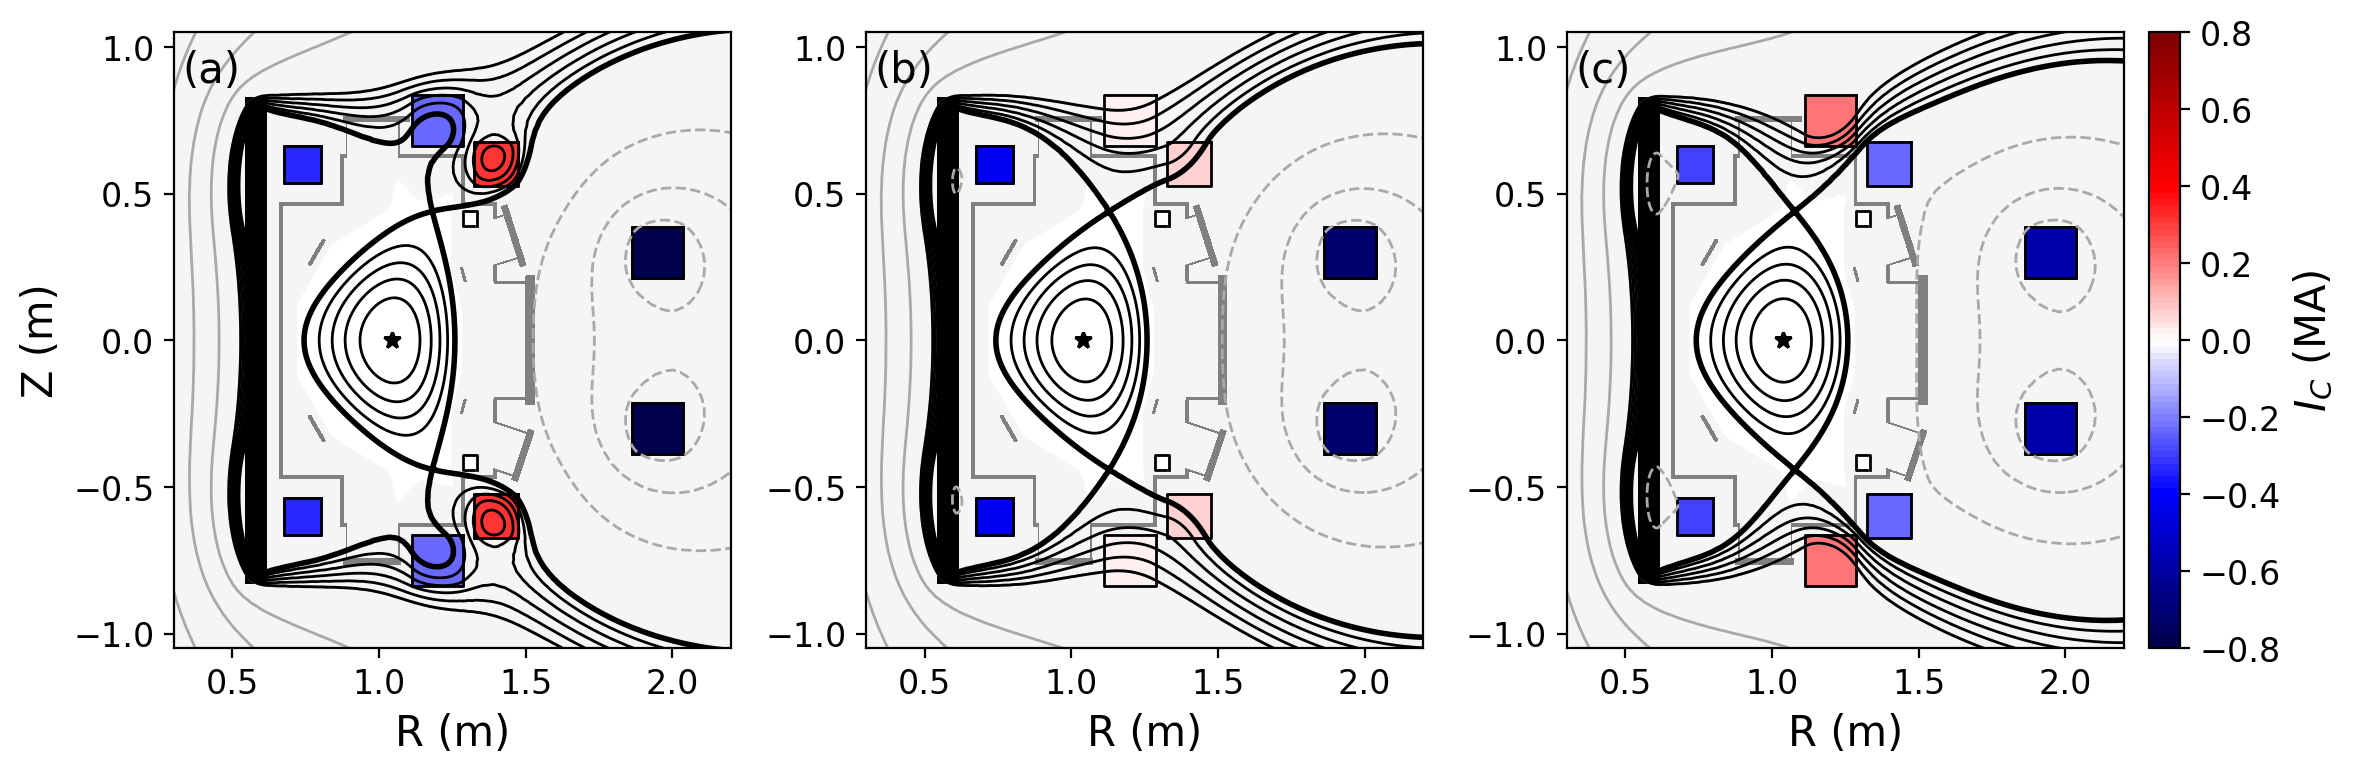

In [21]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(1, 3, width_ratios=[1, 1,1.1], wspace = .2)

fig = plt.figure(figsize = (13,4))
ax[0] = fig.add_subplot(gs[0])
ax[1] = fig.add_subplot(gs[1])
ax[2] = fig.add_subplot(gs[2])

plt.rcParams['lines.linewidth']=1
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
ax[0].set_ylabel('Z (m)', fontsize = 15)
for a in ax:
   #a.fill(vv_outer[:,0], vv_outer[:,1], c = 'k')
   #a.fill(vv_inner[:,0], vv_inner[:,1], c = 'w')
   mygs.plot_machine(fig, a, limiter_color = None,coil_color='k' )
   a.set_xlabel('R (m)', fontsize = 15)
   a.set_xlim([0.3, 2.2])
   for key,val in PFs.items():
       a.plot(corners(val['r'], val['z'], val['dr'], val['dz'])[:,0],corners(val['r'], val['z'], val['dr'], val['dz'])[:,1], c = 'k')

   #a.plot(np.array(geom['DIV1U'])[:,0]/1000,np.array(geom['DIV1U'])[:,1]/1000, c = 'k')
   #a.plot(np.array(geom['DIV1L'])[:,0]/1000,np.array(geom['DIV1L'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['DIV2U'])[:,0]/1000,np.array(geom['DIV2U'])[:,1]/1000, c = 'k')
   a.plot(np.array(geom['DIV2L'])[:,0]/1000,np.array(geom['DIV2L'])[:,1]/1000, c = 'k')

   a.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])

deltas = [-0.7, -0.5, -0.3]
for i, d in enumerate(deltas):
    r, z, zeff = boundaryShape(kapu = 1.7, kapl = 1.7, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True, npts = 16)
    boundary = np.column_stack((r,z))
    boundary = np.nan_to_num(boundary)
    boundary = create_isoflux(4,1,0.0,0.2588,1.7,d)

    x_points = np.zeros((2,2))
    x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
    x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
    x_weights = 50*np.ones(2)
    mygs.set_saddles(x_points, x_weights)

    isoflux_weights = 100*np.ones(len(boundary))
    mygs.set_isoflux(boundary, isoflux_weights)

    mygs.init_psi(0.68,0,0.2, 1.8,0.3)
    mygs.settings.maxits = 100
    mygs.update_settings()
    mygs.solve()
    mygs.plot_psi(fig, ax[i], plasma_nlevels = 6, vacuum_nlevels = 4, xpoint_color = None, xpoint_marker = None, plasma_color = 'k')
    #mygs.plot_constraints(fig, ax[i])
    plt.rcParams['lines.linewidth']=2.0
    mygs.plot_psi(fig, ax[i], plasma_nlevels = 1, vacuum_nlevels = 0, xpoint_color = None, xpoint_marker = None, plasma_color = 'k')
    plt.rcParams['lines.linewidth']=1
    current, map = mygs.get_coil_currents()
    currents_rel = current[3:11]/1E6
    c = cmap(norm(currents_rel))

    for j,(key,val) in enumerate(PFs.items()):
        ax[i].fill(corners(val['r'], val['z'], val['dr'], val['dz'])[:,0],corners(val['r'], val['z'], val['dr'], val['dz'])[:,1], c = c[j])
    #ax[i].fill(np.array(geom['DIV1U'])[:,0]/1000,np.array(geom['DIV1U'])[:,1]/1000, c = 'w')
    ax[i].fill(np.array(geom['DIV2U'])[:,0]/1000,np.array(geom['DIV2U'])[:,1]/1000, c = 'w')
    #ax[i].fill(np.array(geom['DIV1L'])[:,0]/1000,np.array(geom['DIV1L'])[:,1]/1000, c = 'w')
    ax[i].fill(np.array(geom['DIV2L'])[:,0]/1000,np.array(geom['DIV2L'])[:,1]/1000, c = 'w')
    ax[i].set_ylim([-1.05,1.05])
    mygs.print_info()

sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
plt.colorbar(sm, ax =ax[2], fraction=0.05, pad=0.04).set_label(label=r'$I_C$ (MA)',size=15)
ax[0].text(0.33,0.88, '(a)', fontsize = 15)
ax[1].text(0.33,0.88,'(b)' , fontsize = 15)
ax[2].text(0.33,0.88,'(c)', fontsize = 15 )